<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt

In [37]:
# winequality-red.csv の読み込み
wine = pd.read_csv("https://raw.githubusercontent.com/namoshi/colab/master/winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
clf = linear_model.LinearRegression()
 
# 説明変数に "density (濃度)" を利用
#X = wine.loc[:, ['density']].as_matrix()
X = wine.loc[:, ['density']]

# 目的変数に "alcohol (アルコール度数)" を利用
#Y = wine['alcohol'].as_matrix()
Y = wine['alcohol']

print('X\n', X)
print('Y\n', Y)

# 予測モデルを作成
clf.fit(X, Y)
 
print('==============================')
# 回帰係数
print('Coef\n', clf.coef_)
 
# 切片 (誤差)
print('intercept=', clf.intercept_)
 
# 決定係数
print('R^2=', clf.score(X, Y))

X
       density
0     0.99780
1     0.99680
2     0.99700
3     0.99800
4     0.99780
...       ...
1594  0.99490
1595  0.99512
1596  0.99574
1597  0.99547
1598  0.99549

[1599 rows x 1 columns]
Y
 0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64
Coef
 [-280.16382307]
intercept= 289.67534338256445
R^2= 0.2461943643971065


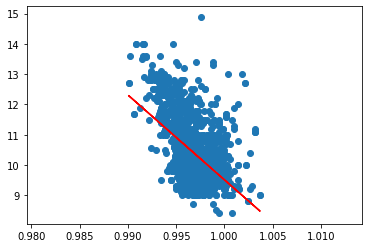

In [39]:
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, clf.predict(X), color='r')

In [40]:
clf = linear_model.LinearRegression()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine['quality']

print('X\n', X)
print('Y\n', Y)

# 予測モデルを作成
clf.fit(X, Y)

print('==============================')
# 重回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

# 決定係数
print('R^2=', clf.score(X, Y))

X
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxid

In [41]:
clf = linear_model.LinearRegression()
 
# 説明変数に "density, chlorides, volatile acidity, sulphates" を利用
expvals = {'density', 'chlorides', 'volatile acidity', 'sulphates'}
X = wine[expvals]
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine['quality']

print('X\n', X)
print('Y\n', Y)

# 予測モデルを作成
clf.fit(X, Y)
 
print('==============================')
# 重回帰係数
print(pd.DataFrame({"Name":X.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

# 決定係数
print('R^2=', clf.score(X, Y))

X
       volatile acidity  density  chlorides  sulphates
0                0.700  0.99780      0.076       0.56
1                0.880  0.99680      0.098       0.68
2                0.760  0.99700      0.092       0.65
3                0.280  0.99800      0.075       0.58
4                0.700  0.99780      0.076       0.56
...                ...      ...        ...        ...
1594             0.600  0.99490      0.090       0.58
1595             0.550  0.99512      0.062       0.76
1596             0.510  0.99574      0.076       0.75
1597             0.645  0.99547      0.075       0.71
1598             0.310  0.99549      0.067       0.66

[1599 rows x 4 columns]
Y
 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64
               Name  Coefficients
1           density    -73.712537
2         chlorides     -2.953688
0  volatile acidity     -1.390176
3         sulphates      1.240811

In [42]:
clf = linear_model.LinearRegression()
 
# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine2_except_quality = wine2.drop("quality", axis=1)
X = wine2_except_quality
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine2['quality']

print('X\n', X)
print('Y\n', Y)

# 予測モデルを作成
clf.fit(X, Y)
 
print('==============================')
# 重回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

# 決定係数
print('R^2=', clf.score(X, Y))

X
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.081384          0.117931    -0.270976       -0.043754  -0.019143   
1         -0.045986          0.241219    -0.270976        0.004191   0.017585   
2         -0.045986          0.159027    -0.230976       -0.016357   0.007568   
3          0.254899         -0.169740     0.289024       -0.043754  -0.020812   
4         -0.081384          0.117931    -0.270976       -0.043754  -0.019143   
...             ...               ...          ...             ...        ...   
1594      -0.187579          0.049438    -0.190976       -0.036904   0.004229   
1595      -0.214127          0.015191    -0.170976       -0.023206  -0.042515   
1596      -0.178729         -0.012206    -0.140976       -0.016357  -0.019143   
1597      -0.214127          0.080260    -0.150976       -0.036904  -0.020812   
1598      -0.205278         -0.149192     0.199024        0.072685  -0.034168   

      free sulfur dioxid

In [43]:
clf = linear_model.LinearRegression()
 
# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()

# 説明変数に "'chlorides', 'sulphates', 'volatile acidity', 'alcohol'" を利用
expvals = {'chlorides', 'sulphates', 'volatile acidity', 'alcohol'}
X = wine2[expvals]

# 目的変数に "quality (品質スコア)" を利用
Y = wine2['quality']

print('X\n', X)
print('Y\n', Y)

# 予測モデルを作成
clf.fit(X, Y)
 
print('==============================')
# 重回帰係数
print(pd.DataFrame({"Name":X.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

# 決定係数
print('R^2=', clf.score(X, Y))

X
       sulphates   alcohol  chlorides  volatile acidity
0     -0.058772 -0.157382  -0.019143          0.117931
1      0.013085 -0.095844   0.017585          0.241219
2     -0.004880 -0.095844   0.007568          0.159027
3     -0.046796 -0.095844  -0.020812         -0.169740
4     -0.058772 -0.157382  -0.019143          0.117931
...         ...       ...        ...               ...
1594  -0.046796  0.011849   0.004229          0.049438
1595   0.060989  0.119541  -0.042515          0.015191
1596   0.055001  0.088772  -0.019143         -0.012206
1597   0.031049 -0.034305  -0.020812          0.080260
1598   0.001108  0.088772  -0.034168         -0.149192

[1599 rows x 4 columns]
Y
 0      -0.127205
1      -0.127205
2      -0.127205
3       0.072795
4      -0.127205
          ...   
1594   -0.127205
1595    0.072795
1596    0.072795
1597   -0.127205
1598    0.072795
Name: quality, Length: 1599, dtype: float64
               Name  Coefficients
2         chlorides      0.197084
0         